<a href="https://colab.research.google.com/github/CosiMichele/2503-carp-biat/blob/megh/BIAT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bring It All Together (pt. 1)

All thanks go to Sarah Stueve and Megh Krishnaswamy for their work on the notebook.

The goal of this notebook is to exercise the acquired Python knowledge obtained on day 2 of the Software Carpentries workshop.

You will be:
1. Importing the `gapminder_all.csv` file
2. Index contries, filter and remove redundant columns
3. Create a list of desired countries to compare and create a simple graph (frequency distribution table and word cloud)

---

## 1. Import required Packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

---

## 2. Download, Import and Clean Data

In the next cell, use a bash one-liner (`wget <raw github url>`) to download the dataset from the github repository into Google Colab's file system, and use the correct functions to import the raw csv file and index by country.

To find the raw Github url for a file, click on the 'raw' button on the top right corner in the Github link to a file.

![](https://raw.githubusercontent.com/CosiMichele/2503-carp-biat/main/github_raw_button.png)

In [3]:
# gt CSV file from a web url:
!wget https://raw.githubusercontent.com/CosiMichele/2503-carp-biat/refs/heads/main/gapminder_all.csv

--2025-03-23 05:17:31--  https://raw.githubusercontent.com/CosiMichele/2503-carp-biat/refs/heads/main/gapminder_all.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 49082 (48K) [text/plain]
Saving to: ‘gapminder_all.csv’

gapminder_all.csv   100%[===================>]  47.93K  --.-KB/s    in 0.05s   

2025-03-23 05:17:31 (883 KB/s) - ‘gapminder_all.csv’ saved [49082/49082]



In [4]:
raw_data = pd.read_csv("gapminder_all.csv").set_index("country")


### 2.1 Use the right function to drop the `continent` column.

In [5]:
data = raw_data.drop(columns="continent")

### 2.2 Filter the columns

When filtering columns, you can use `data.drop(columns=data.filter(like="<column to drop>").columns)`. Here, `like` is used to search for a string in the column name, and `filter` removes all matches.

In the next 2 cells, first filter the `lifeExp_` column and the the `pop_` column.

In [6]:
data = data.drop(columns=data.filter(like="lifeExp_").columns)

In [7]:
data = data.drop(columns=data.filter(like="pop_").columns)

### 2.3 Print index

In order to continue, you will need to use the correct format for each country's name (as they appear in data frame). In the next cell, use a `for` loop to print the index (that in this case, is the countries).

In [8]:
for i in data.index:
    print(i)

Algeria
Angola
Benin
Botswana
Burkina Faso
Burundi
Cameroon
Central African Republic
Chad
Comoros
Congo Dem. Rep.
Congo Rep.
Cote d'Ivoire
Djibouti
Egypt
Equatorial Guinea
Eritrea
Ethiopia
Gabon
Gambia
Ghana
Guinea
Guinea-Bissau
Kenya
Lesotho
Liberia
Libya
Madagascar
Malawi
Mali
Mauritania
Mauritius
Morocco
Mozambique
Namibia
Niger
Nigeria
Reunion
Rwanda
Sao Tome and Principe
Senegal
Sierra Leone
Somalia
South Africa
Sudan
Swaziland
Tanzania
Togo
Tunisia
Uganda
Zambia
Zimbabwe
Argentina
Bolivia
Brazil
Canada
Chile
Colombia
Costa Rica
Cuba
Dominican Republic
Ecuador
El Salvador
Guatemala
Haiti
Honduras
Jamaica
Mexico
Nicaragua
Panama
Paraguay
Peru
Puerto Rico
Trinidad and Tobago
United States
Uruguay
Venezuela
Afghanistan
Bahrain
Bangladesh
Cambodia
China
Hong Kong China
India
Indonesia
Iran
Iraq
Israel
Japan
Jordan
Korea Dem. Rep.
Korea Rep.
Kuwait
Lebanon
Malaysia
Mongolia
Myanmar
Nepal
Oman
Pakistan
Philippines
Saudi Arabia
Singapore
Sri Lanka
Syria
Taiwan
Thailand
Vietnam
West Bank 

### 2.4 Extract years

Extract year from last 4 characters of each column name.

The current column names are structured as `gdpPercap_(year)`, so we want to keep the `(year)` part only for clarity when plotting GDP vs. years.

To do this we use `replace()`, which removes from the string the characters stated in the argument. This method works on strings, so we use `replace()` from Pandas Series.str vectorized string functions.

In [9]:
years = data.columns.str.replace('gdpPercap_', '')

# Convert year values to integers, saving results back to dataframe

data.columns = years.astype(int)

---

## 3 Visualizing Numerical Data: Listing and Plotting

In the next cell, select a country to plot.

<Axes: >

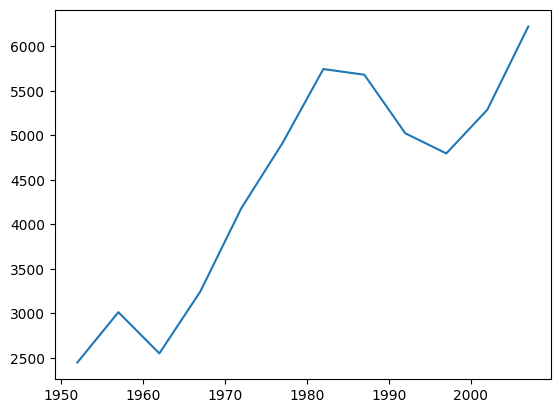

In [10]:

data.loc['Algeria'].plot()

### 3.1 Create a list

Compare 5 countries of your choice. Create a list of countries that you are interested in.

In [11]:
sel_countries = ["Algeria", "Angola", "Burundi", "Australia", "Italy"]

### 3.2 Use index.isin() to filter

`.isin(sel_countries)` checks whether each value in the index is present in the list `sel_countries`. Make sure to save to a different dataframe.

In [12]:
data_countries = data[data.index.isin(sel_countries)]

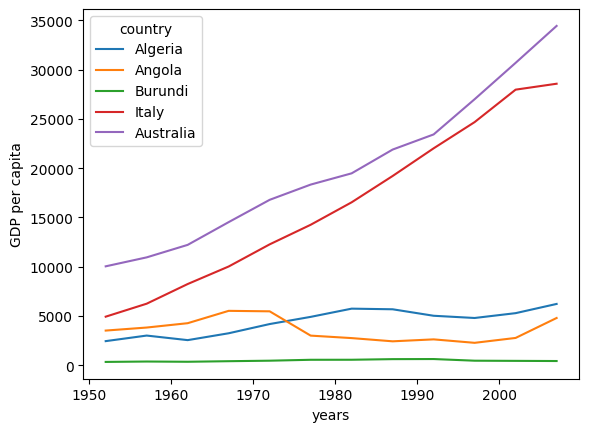

In [13]:
data_countries.T.plot()
plt.ylabel('GDP per capita')
plt.xlabel('years')
plt.savefig("countries_comparison.png", dpi=300)

## 3 Visualizing Text Data: Plotting and Representing Frequency Distributions
